# Titanic-Machine Learning from Disaster Analysis and Classification

This notebook is my personal project that will discuss the problem of the Titanic Disaster using the Kaggle dataset. I will do some exploration, data analysis, data pre-processing, and build machine learning models from the dataset. I hope that the notebook can be a medium for me to learn more and more.

## Problem Description and the Objective

The sinking of the RMS Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crews. This harrowing tragedy shocked the international community and led to better safety regulations for ships.

In this problem, we're asked to complete the analysis of what sorts of passengers were likely to survive the tragedy using machine learning. Our job is to predict if a passenger survived the sinking Titanic or not with the help of machine learning.

## Importing Library and Collecting Data
After importing the required modules, let's read train and test data from csv files.

In [1]:
#Basic modules: data manipulation and linear algebra
import pandas as pd
import numpy as np
#For 2D data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For regular expression
import re

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the training data and the test data
train_data= pd.read_csv("train.csv")
test_data= pd.read_csv("test.csv")

## Exploratory Data Analysis

Before we start to classify, we need to do some exploration of the data. From this process, we can find some insights and do some analysis that will important and may be useful in the later stages.

In [3]:
#View the training data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


After opening the dataset, we know that:
1. There are 891 rows and 12 columns.
2. The columns are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.

In [4]:
#See the information of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see the information about the training data:
1. From 12 columns, there are 3 data types: 5 columns are integer, 5 columns are object, and 2 columns are float.
2. We know that the 12 columns are divided by 11 columns called "features" and 1 column called "target".
3. The "Survived" column is the "target" and the others are the "features".

In [5]:
#Describe the training data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Different from the information, we can also know how the training data being described. The information we got is mostly about statistics information. From the data, we can know that:
1. The amount of the data, the mean, the standard deviation, and many more.
2. There is a "feature" that has null data: Age column.
3. The data that has been described is the numerical data, the categorical data is not displayed.

In [6]:
#Check the missing value of the training data
description = pd.Series(['incrementing order of passengers',
                         'Survival (0 = No; 1 = Yes)',
                         'indication of economical status',
                         'Name of passenger',
                         'male or female',
                         'Age ranging from 0 to 82',
                         'Number of siblings or spouces', 
                         'Number of parents or children', 
                         'Ticket number', 
                         'Price of ticket',
                         'Cabin number', 
                         'Embarkation port (Southampton, Cherbourg, Queenstown)'], index= train_data.columns)

missing_value_df = pd.DataFrame({'missing_values (#)': train_data.isnull().sum(),
                                 'missing_values (%)': round(train_data.isnull().sum() * 100 / len(train_data), 2),
                                 'description': description
                                }
                               )
display(missing_value_df)

,missing_values (#),missing_values (%),description
PassengerId,0,0.00,incrementing order of passengers
Survived,0,0.00,Survival (0 = No; 1 = Yes)
Pclass,0,0.00,indication of economical status
Name,0,0.00,Name of passenger
Sex,0,0.00,male or female
Age,177,19.87,Age ranging from 0 to 82
SibSp,0,0.00,Number of siblings or spouces
Parch,0,0.00,Number of parents or children
Ticket,0,0.00,Ticket number
Fare,0,0.00,Price of ticket


The data displayed above is about the "features" that have null data, including the categorical data, on the training data. From the data frame, we can see:
1. There are 177 missing values (19.87%) on the Age column.
2. There are 687 missing values (77.1%) on the Cabin column.
3. There are 2 missing values (0.22%) on the Embarked column.
4. We can also know the means of every "feature" from the description.

In [7]:
#Checking the missing value of the test data
description = pd.Series(['incrementing order of passengers',
                         'indication of economical status',
                         'Name of passenger',
                         'male or female',
                         'Age ranging from 0 to 82',
                         'Number of siblings or spouces', 
                         'Number of parents or children', 
                         'Ticket number', 
                         'Price of ticket',
                         'Cabin number', 
                         'Embarkation port (Southampton, Cherbourg, Queenstown)'], index= test_data.columns)

missing_value_df = pd.DataFrame({'missing_values (#)': test_data.isnull().sum(),
                                 'missing_values (%)': round(test_data.isnull().sum() * 100 / len(test_data), 2),
                                 'description': description
                                }
                               )
display(missing_value_df)

,missing_values (#),missing_values (%),description
PassengerId,0,0.00,incrementing order of passengers
Pclass,0,0.00,indication of economical status
Name,0,0.00,Name of passenger
Sex,0,0.00,male or female
Age,86,20.57,Age ranging from 0 to 82
SibSp,0,0.00,Number of siblings or spouces
Parch,0,0.00,Number of parents or children
Ticket,0,0.00,Ticket number
Fare,1,0.24,Price of ticket
Cabin,327,78.23,Cabin number


Different from the training data, the data displayed above is about the "features" that have null data, including the categorical data, on the test data. From the data frame, we can see:
1. There are 86 missing values (20.57%) on the Age column.
2. There is 1 missing value (0.24%) on the Fare column.
3. There are 327 missing values (78.23%) on the Cabin column.
4. We can also know the means of every "feature" from the description.

### Some Conlusions
From the information we got, we can note a few things:
1. We need to convert a lot of features into numeric one, so that the machine learning algorithms can process them.
2. We can see that the features have widely different ranges, that we will need to convert into roughly the same scale.
3. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [8]:
#The number of passenger based on the gender
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Before we make some exploration, I think the most important information we should know is how many passengers on the Titanic. Based on the training data, we know that there are 891 passengers: 577 male passengers and 314 female passengers.

In [9]:
#The survived status from the Titanic passenger
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

From 891 passengers, there are 549 people died and 342 people survived.

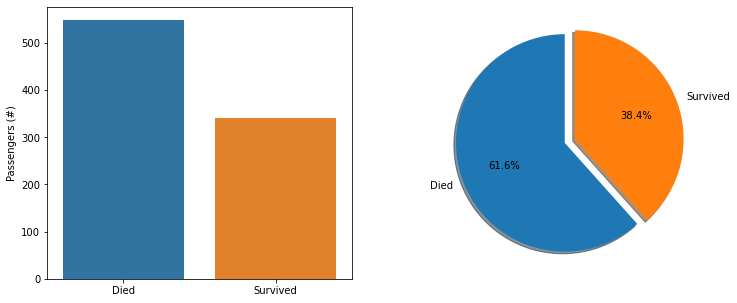

In [10]:
#Looking for the survival rate info
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], x='Survived', data= train_data)
axes[0].set_ylabel('Passengers (#)')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['Died', 'Survived'])
# the semicolon at the end of piechart is used to make text before chart disappear
axes[1].pie(train_data.Survived.value_counts(), explode=[0, 0.1], labels=['Died', 'Survived'], autopct='%1.1f%%', shadow=True, startangle=90);

From the "features" we have, we can make some exploration.
The first one we can explore is the survival rate information. We can know the survival rate information from the Passenger column and the Survived column. From the plot above, we know that:
1. 61.6% of the Titanic's passenger is died.
2. 38.4% of the Titanic's passenger is survived.

In [11]:
#Looking for the percentage of women who survived
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("The number of women who survived: ", sum(women))
print("% of women who survived:", "%.2f" % (rate_women*100))

The number of women who survived:  233
% of women who survived: 74.20


In [12]:
diedWomen= train_data.loc[train_data.Sex == 'female'][train_data.Survived == 0]
rate_diedWomen = len(diedWomen)/len(women)

print("The number of women who died: ", len(diedWomen))
print("% of women who died:", "%.2f" % (rate_diedWomen*100))

The number of women who died:  81
% of women who died: 25.80


<ipython-input-12-0336251d6fea>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diedWomen= train_data.loc[train_data.Sex == 'female'][train_data.Survived == 0]


The next exploration is about the number and the percentage of women who survived and died in Titanic disaster:
1. Of 38.4% survived passenger, there are 233 (74.2%) women who survived.
2. Of 61.6% died passenger, there are 81 (25.8%) women who died.

In [13]:
#Looking for the percentage of men who survived
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("The number of men who survived: ", sum(men))
print("% of men who survived:", "%.2f" % (rate_men*100))

The number of men who survived:  109
% of men who survived: 18.89


In [14]:
diedMen= train_data.loc[train_data.Sex == 'male'][train_data.Survived == 0]
rate_diedMen = len(diedMen)/len(men)

print("The number of men who died: ", len(diedMen))
print("% of men who died:", "%.2f" % (rate_diedMen*100))

The number of men who died:  468
% of men who died: 81.11


<ipython-input-14-0b9281dbb3db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diedMen= train_data.loc[train_data.Sex == 'male'][train_data.Survived == 0]


The next exploration is about the number and the percentage of men who survived and died in Titanic disaster:
1. Of 38.4% survived passenger, there are 109 (18.89%) men who survived.
2. Of 61.6% died passenger, there are 468 (81.11%) men who died.

In [15]:
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)

print("The number of passenger who survived and in the Pclass 1: ", sum(class1))
print("Total number of passenger in the Pclass 1: ", len(class1))
print("% of number who survived:", "%.2f" % (rate_class1*100))

The number of passenger who survived and in the Pclass 1:  136
Total number of passenger in the Pclass 1:  216
% of number who survived: 62.96


In [16]:
class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)

print("The number of passenger who survived and in the Pclass 2: ", sum(class2))
print("Total number of passenger in the Pclass 2: ", len(class2))
print("% of number who survived:", "%.2f" % (rate_class2*100))

The number of passenger who survived and in the Pclass 2:  87
Total number of passenger in the Pclass 2:  184
% of number who survived: 47.28


In [17]:
class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)

print("The number of passenger who survived and in the Pclass 3: ", sum(class3))
print("Total number of passenger in the Pclass 3: ", len(class3))
print("% of number who survived:", "%.2f" % (rate_class3*100))

The number of passenger who survived and in the Pclass 3:  119
Total number of passenger in the Pclass 3:  491
% of number who survived: 24.24


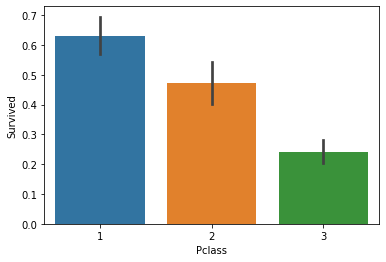

In [18]:
#The survived status based on the Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data);

The next exploration is about the survived status based on the Pclass:
1. The total number of passenger in the Pclass 1 is 216 and the number who survived is 136 (62.96%).
2. The total number of passenger in the Pclass 2 is 184 and the number who survived is 87 (47.28%).
3. The total number of passenger in the Pclass 3 is 491 and the number who survived is 119 (24.24%).
4. Based on the bar plot, we know that the highest chance and number of passenger who survived is passenger that in Pclass 1, the second one is Pclass 2, and the last one is Pclass 3.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


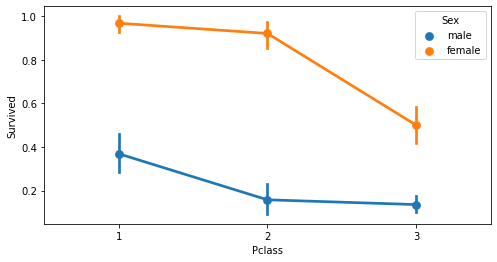

In [19]:
#The correlation between Pclass, survived, and sex
fig, ax = plt.subplots(figsize=(8, 4))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data= train_data, ax=ax)

display(pd.crosstab(train_data.Sex, train_data.Survived, margins=True).style.background_gradient(cmap='summer_r'))
display(pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap='summer_r'))

The next exploration is about finding the correlation between Pclass, Sex, and Survived column. We found that:
1. The two crosstab are the visualization of the exploration about the number of survived based on gender and the number of survived based on Pclass (We discussed it already before).
2. There is 2 point plot:
- The first point plot told us that for female passengers, passenger that in Pclass 1 have the highest chance to survive. The second one is the Pclass 2, and the last one is Pclass 3.
- The second point plot told us that for male passengers, passenger that in Pclass 1 have the highest chance to survive. The second one is the Pclass 2, and the last one is Pclass 3.
3. Regardless of gender, the 1st class passengers have greater chance to survive, while 3rd class passengers have a really low survival rate.
4. We can see the comparison of the two point plot that wherever the Pclass of the male passengers, they have lower chance to survive rather than the female passengers.

C:\Users\alazz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


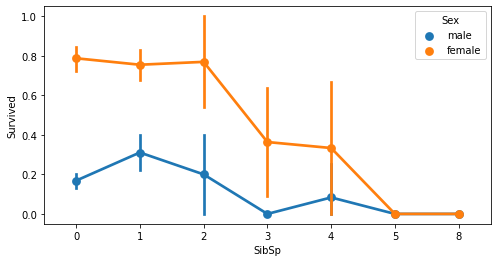

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.pointplot('SibSp', 'Survived', hue='Sex', data= train_data, ax=ax)
display(pd.crosstab(train_data.SibSp, train_data.Pclass).style.background_gradient(cmap='summer_r'))

From the plot above, we know that:
1. Lonely male passenger had almost 60% less chances to survive than female passenger.
2. Male passenger with one sibling or spouce had almost double chances to survive compared to the loners. I guess having someone to take care of you during a disaster of this magnitude is of great importance.
3. Female passenger seem to have similar chances of survival with or without siblings or spouces. However, when this number exceeds two, their chances of survival drops. My guess is that this is associated with the class as well. 3rd class passengers tend to have greater families, so the survival rate is low.

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


C:\Users\alazz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


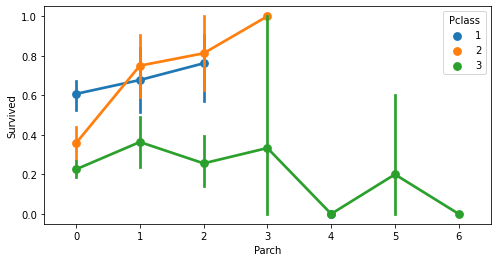

In [21]:
display(pd.crosstab(train_data.Parch, train_data.Pclass).style.background_gradient(cmap='summer_r'))
fig, ax = plt.subplots(figsize=(8, 4))
sns.pointplot('Parch', 'Survived', data= train_data, hue='Pclass', ax=ax);

From the plot above, we know that:
1. Regardless of class, passengers without children or parents seem to have minimum chances of survival.
2. Class 1 and 2, seem to have a rise in survival rate when the number of parents or children increases. Parch for these two classes does not increase beyond 2 and 3 respectively. The way I interpret this, the richer a passenger, the fewer children they have.
3. For the 3rd class, Parch doesn't seem to affect the survival rate in a positive way. Especially passengers with 4 or 6 parents or children seem to have no chance to survive. It could be that these passengers stayed in the lower decks which flooded first or they didn't have enough time to reach the lifeboats on time.

C:\Users\alazz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alazz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alazz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

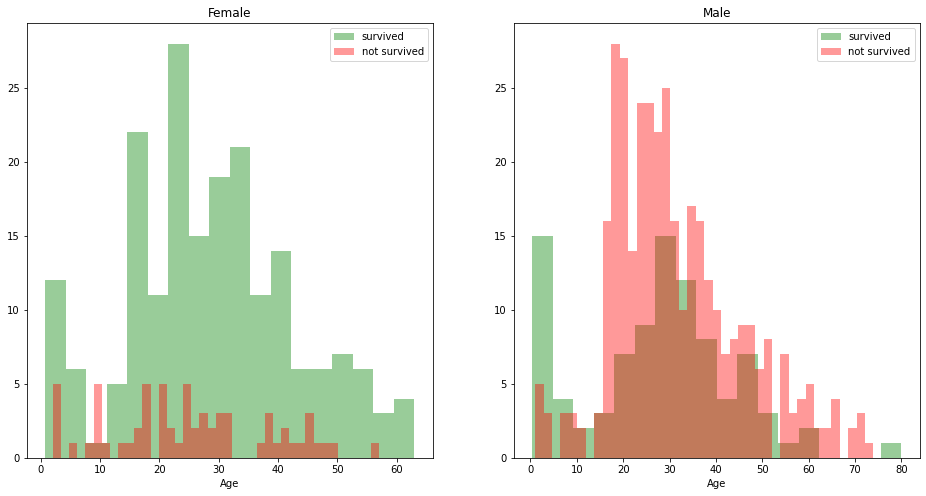

In [22]:
#The plot of gender, age, the survived status
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

From the plot above, we got some information:
1. Male passengers who died is higher than the female passengers who died and male passengers who survived is lower than the female passengers who survived.
2. Female passengers in 15-35 are the highest number of passengers who survived and for the dead passengers, it's evenly distributed (there is no age-span that high or dominant).
3. Male passengers under 5 and 18-30 are the highest number of passengers who survived, while male passengers in 15-30 are the highest number of passengers who died. There is the same age group (18-30), but the number of dead passengers is higher than the survived passengers.
4. The unique information is there is/are male passenger(s) in 75-80 who survived.

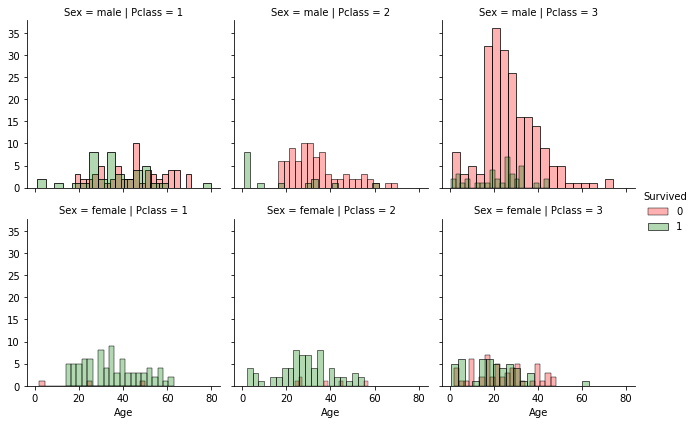

In [23]:
#The correlation between Pclass, Sex, Age, and Survived status
pal = ['red', 'green']        
g = sns.FacetGrid(train_data, col='Pclass', row='Sex', palette=pal, hue='Survived', hue_order=[0, 1])
g.map(sns.histplot, 'Age',  alpha=.3, bins=20)
g.add_legend();

The plot above told us about the distribution of survived or dead passengers based on gender and the Pclass. We can know the age distribution too. There is some information we got from the plot:
1. Male passengers from the 2nd and the 3rd class have the lowest survival rate, while male passengers from the 1st class have 50-50 chance to survive.
2. Female passengers from the 1st and the 2nd class have the greatest chances of survival, while female passengers in the 3rd class have 50-50 chance to survive.

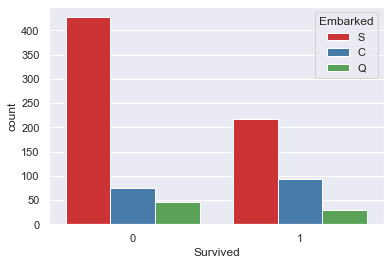

In [24]:
#The survived status based on the embarked
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set1");

The plot above told us about the embarkation port and the survival status. From the plot, we know that:
1. The highest number of passengers who survived and died are the passengers from Southampton embarkation port. I think it's because most of the passenger embarkation port is Southampton.
2. The lowest number of passengers who survived and died are the passengers from Queenstown embarkation port. I think it's because the number of passengers that have Queenstown as their embarkation port is the lowest too.

## Data pre-processing

Besides found some insights and interesting facts, we found some "weakness" of the data too: that's why we need to do data pre-processing. With data pre-processing, we can "repair" the data and make sure that the data is ready to used in the Machine Learning model.

In [25]:
#Check the columns that have null data in the training data
for col in train_data.columns:
    print(col, ":", train_data[col].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [26]:
#Check the columns that have null data in the training data
for col in test_data.columns:
    print(col, ":", test_data[col].isnull().sum())

PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0


After made some explorations, the next step is data preprocessing. Recalling the first thing we do after opened the **training data**, we know that there are some columns that have missing values:
1. There are 177 missing values (19.87%) on the Age column.
2. There are 687 missing values (77.1%) on the Cabin column.
3. There are 2 missing values (0.22%) on the Embarked column.

Some columns that have missing values in **test data**:
1. There are 86 missing values (20.57%) on the Age column.
2. There is 1 missing value (0.24%) on the Fare column.
3. There are 327 missing values (78.23%) on the Cabin column.

Based on some conclusions we got before, we need to deal with some tasks:
1. We need to convert a lot of features into numeric one, so that the machine learning algorithms can process them.
2. We can see that the features have widely different ranges, that we will need to convert into roughly the same scale.
3. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [27]:
#Fill the null data in Age column
data= [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

To deal with the missing values in Age column, we will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null. All the missing values in Age column will be filled with that random numbers until everything is filled. Besides that, we also convert the data type of the Age column from float to integer.

In [28]:
#Describe Embarked column
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
#Fill the null value in the Embarked column with most common value
common_value = 'S'
data= [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

To deal with the missing values in Embarked column, we need to check how the Embarked data has been described. We know that there are 2 missing values in Embarked column, so we will fill these with the most common value, that is the "S" value (Southampton).

In [30]:
#Describe Ticket column
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [31]:
#Dropping Ticket column
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

We want to know how the Ticket data has been described. Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So, we will drop it from the dataset.

In [32]:
#Fill the missing value in the Fare column and convert them from float to int64
data= [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

We know that there is 1 missing value in the Fare column, so we will simply fill in the missing value with zero. We will convert the data type of the Fare column from float to integer too.

C:\Users\alazz\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alazz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


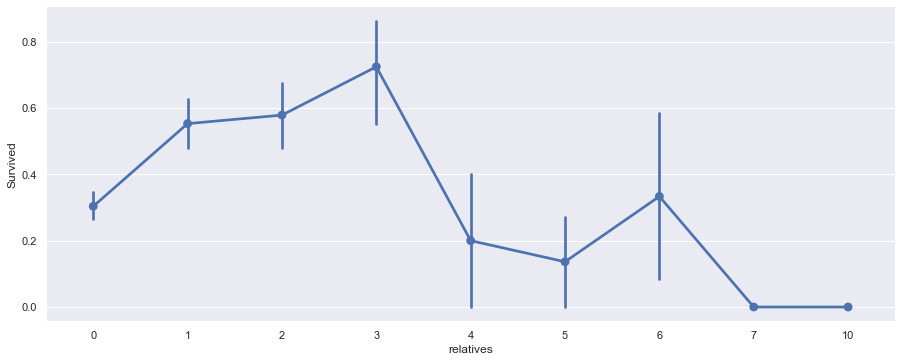

In [33]:
#New features: relatives and travelled_alone
data= [train_data, test_data]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 1
    dataset['travelled_alone'] = dataset['travelled_alone'].astype(int)

#Plot the correlation between survived and relatives
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, );

We know that we have Sibsp columns (sibling spouse) and Parch columns (parent-child). From these two columns, we can make new features called relatives and travelled_alone. We can find the number of the passenger's relatives by adding the Sibsp column with the Parch column. For passengers that have relatives, so they didn't travel alone. For passengers that didn't have relatives, so they did travel alone. We also convert the data type of the travelled_alone column to an integer.

From the plot above, we know some facts:
1. Having 1-3 relatives increases the chance to survive in the disaster rather than travelled alone. I think it's because having someone to take care of you during a disaster of this magnitude is of great importance. I think it's still possible to deal with the problems during a disaster when you have up to 3 relatives.
2. Having more than 3 relatives decreases the chance to survive.
3. Having 7 and 10 relatives made it impossible to survive in this disaster. I think it's because you will try to help your relatives even you will sacrifice your life. My other guess is maybe it's because of the position of the passenger that more relatives = lower the class (3rd class). It could be that these passengers stayed in the lower decks which flooded first or they didn't have enough time to reach the lifeboats on time.

In [34]:
#Make new column called deck that extracted from cabin column
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data= [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we will drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

First, I thought we have to drop the Cabin column because we know that we need to deal with 687 missing values. But, after I read the data, I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore, we’re going to extract these and create a new feature, called "deck", that contains a person deck. Afterwards we will convert the feature into a numeric variable (an integer). The 687 missing values will be converted to zero.

In [35]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

Apart from the Cabin column, I want to drop the Name column because I think it's not an important feature. But, after I read some Kaggle Kernel, I think it's possible to use the Name column to extract the Titles from the Name, so that we can build a new feature out of that. The new feature will be called Title. This feature will be converted to an integer and passengers who didn't have titles will be filled by zero.

In [36]:
#Categorizing every age into a group
data= [train_data, test_data]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

We know that we have Age column that has widely different ranges. I think it's important to categorize the age range into some groups. Note that it is important to place attention on how you form these groups since you don’t want for example that 80% of your data fall into group 1. We will categorize the age range into 6 groups in total.

In [37]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Same with the Age feature that has widely different ranges, we need to categorize the fare range into some groups. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. We will categorize the fare range into 5 groups in total.

In [38]:
#Mapping sex column
genders = {"male": 0, "female": 1}
data= [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Sex feature is one of the features that need to be converted to numeric one so that the machine learning algorithms can process them. We just need to map the male and female into the numeric ones.

In [39]:
#Mapping embarked column
ports = {"S": 0, "C": 1, "Q": 2}
data= [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Same with the sex feature, we need to convert the Embarked feature to numeric so that the machine learning algorithms can process them. We just need to map the S, C, and Q into the numeric ones.

In [40]:
#Categorizing every relatives into a group
data= [train_data, test_data]

for dataset in data:
    dataset.loc[dataset['relatives'] == 0, 'relatives'] = 0
    dataset.loc[dataset['relatives'] >= 1, 'relatives'] = 1

The same concept with the sex and embarked features, I will try to categorize the relatives feature into some groups. I will categorize it into 2 groups: have relatives and didn't have relatives.

In [41]:
#Check the columns that have null data in the training data
for col in train_data.columns:
    print(col, ":", train_data[col].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0
relatives : 0
travelled_alone : 0
Deck : 0
Title : 0


In [42]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title
0,1,0,3,0,2,1,0,0,0,1,0,8,1
1,2,1,1,1,5,1,0,3,1,1,0,3,3
2,3,1,3,1,3,0,0,0,0,0,1,8,2
3,4,1,1,1,5,1,0,3,0,1,0,3,3
4,5,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3,0,0,1,0,0,1,8,5
887,888,1,1,1,2,0,0,2,0,0,1,2,2
888,889,0,3,1,3,1,2,2,0,1,0,8,2
889,890,1,1,0,3,0,0,2,1,0,1,3,1


In [43]:
#Check the columns that have null data in the test data
for col in test_data.columns: 
    print(col, ":", test_data[col].isnull().sum())

PassengerId : 0
Pclass : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0
relatives : 0
travelled_alone : 0
Deck : 0
Title : 0


In [44]:
#View the test data
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title
0,892,3,0,2,0,0,0,2,0,1,8,1
1,893,3,1,5,1,0,0,0,1,0,8,3
2,894,2,0,3,0,0,1,2,0,1,8,1
3,895,3,0,5,0,0,1,0,0,1,8,1
4,896,3,1,5,1,1,1,0,1,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,1,0,0,1,8,1
414,1306,1,1,6,0,0,4,1,0,1,3,5
415,1307,3,0,5,0,0,0,0,0,1,8,1
416,1308,3,0,5,0,0,1,0,0,1,8,1


The final step before building the machine learning model is that I want to confirm if any values are missing in the training data and test data. After I've checked it and I found that all the columns have values, I'm sure that the data is ready and we can move on to the next step: building a machine learning model.

## Building Machine Learning Model

After the data is ready, now we will train several Machine Learning models and compare their results.

In [45]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [46]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

The first step we need to do is to drop the PassengerId column in the training data. Then we have to drop the Survived column in the training data because we will set it as the target later. 

In [47]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [48]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [49]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [50]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

We trained several machine learning models (Random Forest, Logistic Regression, KNN, and Decision Tree) and will compare their results to know which model performs the best.

In [51]:
#Check the best model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
88.10,KNN
81.37,Logistic Regression


We have checked the model score and we can see that Random Forest and Decision Tree perform the best with the same score. The next step is we will try the Random Forest model with 10 cross-validations.

In [52]:
#10 Cross Validation using Random Forest; Accuracy
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

print("Accuracy: ")
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print("=======================================================================")

print("Recall: ")
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print("=======================================================================")

print("Precision: ")
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "precision")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print("=======================================================================")

print("f1 score: ")
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "f1")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy: 
Scores: [0.78888889 0.83146067 0.76404494 0.83146067 0.87640449 0.85393258
 0.79775281 0.78651685 0.84269663 0.83146067]
Mean: 0.8204619225967541
Standard Deviation: 0.03309812652710342
Recall: 
Scores: [0.68571429 0.70588235 0.58823529 0.85294118 0.76470588 0.79411765
 0.67647059 0.64705882 0.85294118 0.77142857]
Mean: 0.7339495798319327
Standard Deviation: 0.08336049742047213
Precision: 
Scores: [0.8        0.80645161 0.74074074 0.80555556 0.89655172 0.83870968
 0.79310345 0.78571429 0.8        0.83870968]
Mean: 0.810553672216631
Standard Deviation: 0.0387828635948199
f1 score: 
Scores: [0.6984127  0.78125    0.6557377  0.80555556 0.78125    0.80597015
 0.6875     0.70967742 0.80597015 0.78787879]
Mean: 0.7519202464627377
Standard Deviation: 0.0545725018150264


After used 10 cross-validations, we can see the accuracy, recall, precision, and f1 score of the Random Forest model. This looks much more realistic than before because:
1. Our model has an average accuracy of 82% with a standard deviation of 3.3%.
2. The standard deviation shows us how precise the estimates are. This means in our case that the accuracy of our model can differ +— 3.3%.

In [53]:
#Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.227
Sex,0.164
Age,0.148
Fare,0.097
Pclass,0.092
Deck,0.089
SibSp,0.069
Embarked,0.051
Parch,0.037


Text(0.5, 1.0, 'Random Forest Classifier Mean Feature Importance Between Folds')

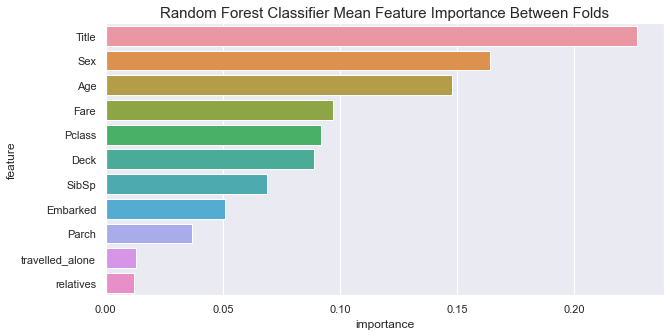

In [54]:
# print importance of each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x='importance', y='feature', data=importances.reset_index())
ax.set_title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

Besides knowing the accuracy of the model with 10 cross-validations, we can also know the feature importance of the model. We can see that title is the most important feature in this model, while relatives and travelled_alone is the less important feature in this model. From this information, we can make some changes and do some hyperparameters to build a better model with higher accuracy.

In [55]:
#Make the submission in Kaggle using Random Forest
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = Y_prediction
submission.to_csv('submission_titanic.csv', index=False)